# Introduction

In response to the COVID-19 pandemic, healthcare systems around the world are facing the challenge of managing their medical resources wisely. Our project uses machine learning to look into data and figure out the best ways to allocate resources, whether there's plenty or not enough. We're using anonymous patient data from Mexico to build models that can predict what COVID-19 patients need. Our main goal is to help health authorities make better decisions on how to distribute resources during the pandemic. By using a variety of advanced machine learning methods, we aim to make healthcare delivery more efficient and effective, which could improve how patients fare and lessen the pandemic's strain on healthcare systems.

For comprehensive project insights, recommendations and model selection, please refer to the Executive Summary. For a deeper dive into the data, consult the Technical Appendix.



# <center> Check and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
print("Shape of df :",df.shape)
df.head()

Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
# NO NaN VALUES BUT MISSING VALUES

df.isna().sum().sum()

0

# <center> Feature Engineering

In [4]:
# NUMBER OF UNIQUE VALUES BY COLUMNS 

for i in df.columns:
    print(i, len(df[i].unique()))

USMER 2
MEDICAL_UNIT 13
SEX 2
PATIENT_TYPE 2
DATE_DIED 401
INTUBED 4
PNEUMONIA 3
AGE 121
PREGNANT 4
DIABETES 3
COPD 3
ASTHMA 3
INMSUPR 3
HIPERTENSION 3
OTHER_DISEASE 3
CARDIOVASCULAR 3
OBESITY 3
RENAL_CHRONIC 3
TOBACCO 3
CLASIFFICATION_FINAL 7
ICU 4


In [5]:
#9999-99-99 REPRESENT ALIVE PEOPLE. DIED OR NOT ? 

df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [6]:
# 1 YES 2 NO 97 AND 99 REPRESENT NaN VALUES

df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

In [7]:
# GET RID OF THE MISSING VALUES 

df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [8]:
# 2 FOR ALIVE 1 FOR DIED

df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [9]:
# 97 VALUES REPRESENT MALES

print(df.PREGNANT.unique())

df['PREGNANT'] = pd.to_numeric(df['PREGNANT'], errors='coerce')
df.PREGNANT = df.PREGNANT.replace(97, 2)

print(df.PREGNANT.unique())

df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

print(df.PREGNANT.unique())

[ 2 97 98  1]
[ 2 98  1]
[2 1]


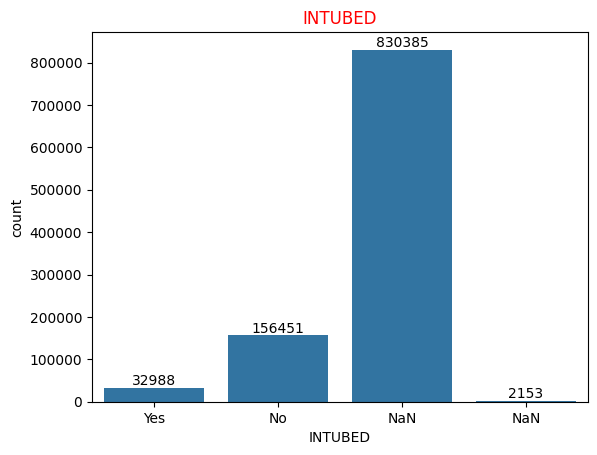

In [10]:
# INTUBED: TOO MANY MISSING VALUES - WILL DROP IT

ax = sns.countplot(x='INTUBED', data=df)

if ax.containers:
    plt.bar_label(ax.containers[0])

# Set the x-axis labels
new_labels = ['Yes', 'No', 'NaN', 'NaN']  
ax.set_xticklabels(new_labels)

plt.title("INTUBED", color="red");

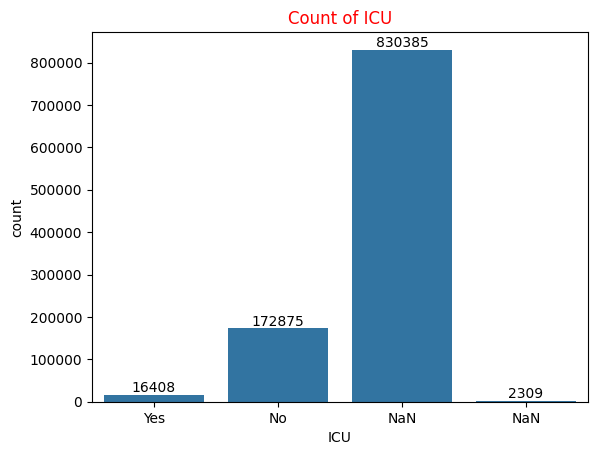

In [11]:
# ICU: TOO MANY MISSING VALUES - WILL DROP IT

ax = sns.countplot(x='ICU', data=df)

if ax.containers:
    plt.bar_label(ax.containers[0])

# Set the x-axis labels
new_labels = ['Yes', 'No', 'NaN', 'NaN']  # Replace these with your desired labels
ax.set_xticklabels(new_labels)

plt.title("Count of ICU", color="red");

In [12]:
# DROP --> INTUBED, ICU and DATE_DIED. DATE_DIED will be used as DEATH feature.    

df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True) 

In [13]:
# NUMBER OF UNIQUE VALUES BY COLUMNS 

for i in df.columns:
    print(i, len(df[i].unique()))

USMER 2
MEDICAL_UNIT 13
SEX 2
PATIENT_TYPE 2
PNEUMONIA 2
AGE 121
PREGNANT 2
DIABETES 2
COPD 2
ASTHMA 2
INMSUPR 2
HIPERTENSION 2
OTHER_DISEASE 2
CARDIOVASCULAR 2
OBESITY 2
RENAL_CHRONIC 2
TOBACCO 2
CLASIFFICATION_FINAL 7
DEATH 2


# <center> Data Visualization

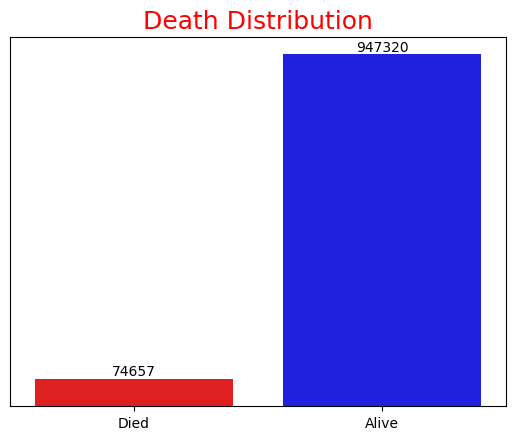

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column named 'DEATH'
# Define a custom color palette
custom_palette = ["red", "blue"]  # Example colors

# Plotting class distribution with sns.countplot
ax = sns.countplot(x='DEATH', data=df, palette=custom_palette)

# Adding bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set primary x-axis labels
primary_x_labels = ['Died', 'Alive']
ax.set_xticklabels(primary_x_labels)

# Remove y-axis tick labels
plt.yticks([])

# Set titles and labels (removing y-label as per original request)
plt.title("Death Distribution", fontsize=18, color="red")
plt.xlabel('')
plt.ylabel('')

plt.show()

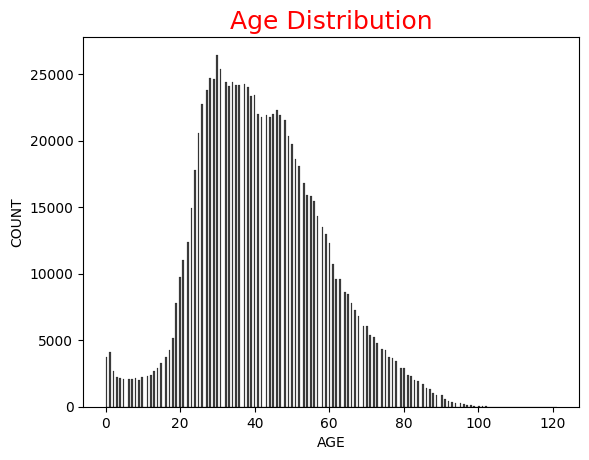

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=df.AGE, color='black')  # Set the color you want for the histogram

plt.title("Age Distribution", color="red", fontsize=18)
plt.ylabel('COUNT')
plt.show()


**OBSERVATION 1:** The histogram indicates that the majority of the patient population is in the mid-age range, with a skew towards younger ages, which could suggest a need for focused public health strategies for the most represented age groups.

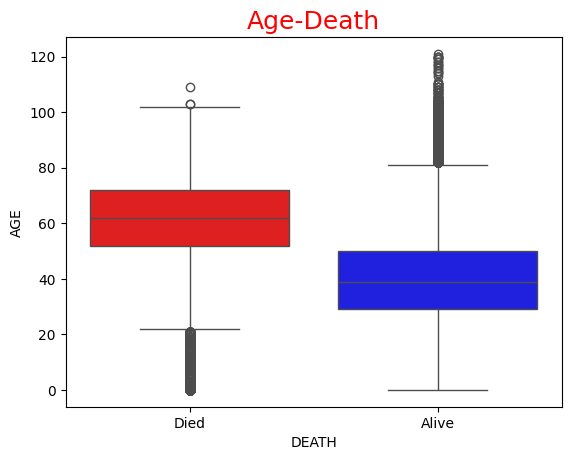

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with your desired colors
custom_palette = ["red", "blue"]  # You can change these colors to your preferences

ax= sns.boxplot(x="DEATH", y="AGE", data=df, palette=custom_palette)
ax.set_axisbelow(True)

primary_x_labels = ['Died', 'Alive']
ax.set_xticklabels(primary_x_labels)

plt.title("Age-Death", fontsize=18, color="red")

# Show the grid
#plt.grid(True)

plt.show()

**OBSERVATION 2:** The boxplot shows that the median age of patients who died is higher compared to those who survived, indicating that age is a significant factor in COVID-19 mortality, which can inform age-targeted treatment and prevention efforts.

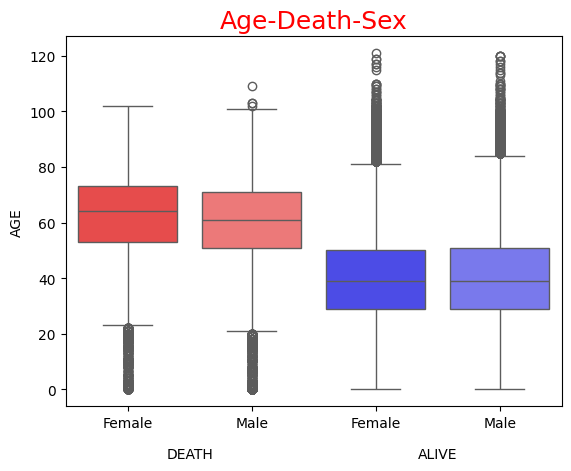

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assume df is correctly loaded and prepared
# Create a new column that combines 'DEATH' and 'SEX' for custom color mapping, ensuring it matches the palette keys
df['DEATH_SEX'] = df.apply(lambda row: (row['DEATH'], row['SEX']), axis=1)

# Adjust the palette_colors to use string keys instead of tuples
palette_colors = {
    '1_1': '#ff3333',  # DEATH 1, SEX 1
    '1_2': '#ff6666',  # DEATH 1, SEX 2
    '2_1': '#3333ff',  # DEATH 2, SEX 1
    '2_2': '#6666ff'   # DEATH 2, SEX 2
}

# Create a new column 'DEATH_SEX' that combines 'DEATH' and 'SEX' into a string that matches the keys in palette_colors
df['DEATH_SEX'] = df['DEATH'].astype(str) + '_' + df['SEX'].astype(str)

# Correctly reference the combined column in the boxplot
ax = sns.boxplot(x="DEATH_SEX", y="AGE", data=df, palette=palette_colors)


# Set the grid to be drawn behind plot elements
ax.set_axisbelow(True)

# # Create legend patches for each custom color (optional)
# legend_patches = [mpatches.Patch(color=color, label=f'Death {sex}') if death == '1' else mpatches.Patch(color=color, label=f'Alive {sex}') for (death, sex), color in palette_colors.items()]

# Add the primary set of x-axis labels for "Death" and "Alive"
primary_x_labels = ['Female', 'Male', 'Female', 'Male']
ax.set_xticklabels(primary_x_labels)

# Draw a vertical line between Category 1 and Category 2 to serve as a separator
#ax.axvline(1.5, color='grey', linestyle='--')  # Adjust the position if necessary

# Manually place the category labels under the plot
ax.text(0.25, -0.13, 'DEATH', ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, -0.13, 'ALIVE', ha='center', va='center', transform=ax.transAxes)

# Update the legend
# plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)

# Set the title
plt.title("Age-Death-Sex", fontsize=18, color="red")

# Remove the x-axis label title
plt.xlabel('')

# Remove the legend
# ax.legend_.remove()

# Show the grid
#plt.grid(True)

# Display the plot
plt.show()

**OBSERVATION 3:** The boxplot shows that both elderly men and women were similarly affected by COVID-19 in terms of mortality, which is important for understanding that age, not gender, was the more critical factor in deaths.

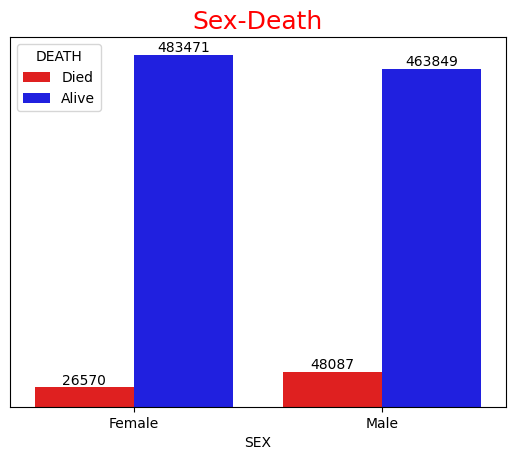

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe loading code
# ...

# Cast 'DEATH' to string for hue categorization
df['DEATH'] = df['DEATH'].astype(str)

# Create the countplot with specified red and blue colors for 'Died' and 'Alive'
ax = sns.countplot(x='SEX', hue='DEATH', data=df, palette=['red', 'blue'])

# Set the title
plt.title("Sex-Death", fontsize=18, color="red")

# Set custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Died', 'Alive'], title='DEATH', loc="best")

# Set custom x-axis labels
ax.set_xticklabels(['Female', 'Male'])

# Add bar labels if there are multiple bars (hues)
if len(ax.containers) > 1:
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])

# Remove y-axis tick labels and y-axis label
plt.yticks([])  # This line removes the numbers/values on the y-axis
plt.ylabel('')  # This line removes the y-axis label

# Show the plot
plt.show()



**OBSERVATION 4:** The bar chart displays that more males have died from COVID-19 than females, a crucial consideration for healthcare strategies that may need to address this gender disparity in outcomes.

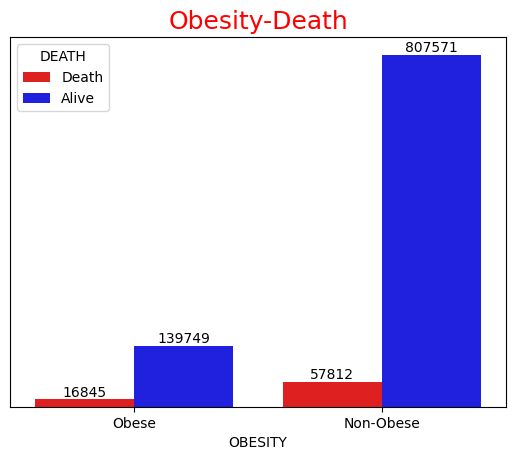

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe loading code
# ...

# Create the countplot with specified red and blue colors for 'Death' and 'Alive'
ax = sns.countplot(x='OBESITY', hue='DEATH', data=df, palette=['red', 'blue'])

# Set the title
plt.title("Obesity-Death", fontsize=18, color="red")

# Set custom legend labels for death status
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Death', 'Alive'], title='DEATH', loc="best")

# Set custom x-axis labels for obesity status
# Assuming '1' is Obese and '2' is Non-Obese in the 'OBESITY' column
ax.set_xticklabels(['Obese', 'Non-Obese'])

# Add bar labels if there are multiple bars (hues)
if len(ax.containers) > 1:
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])

# Remove y-axis tick labels and y-axis label
plt.yticks([])  # This line removes the numbers/values on the y-axis
plt.ylabel('')  # This line removes the y-axis label

# Show the plot
plt.show()

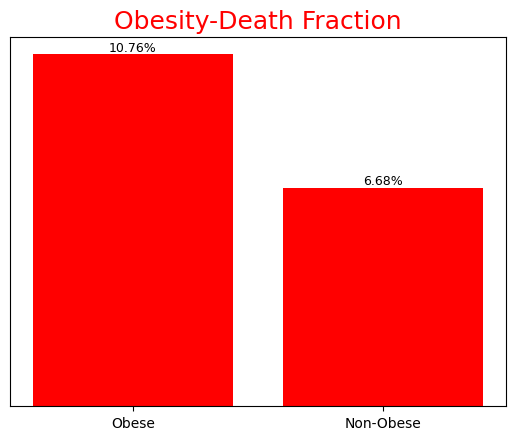

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

obese_death_fraction = 16845 / (16845 + 139749)
non_obese_death_fraction = 57812 / (57812 + 807571)

# Create a bar plot for the fractions
# The x values are the categories, and the y values are the corresponding fractions
categories = ['Obese', 'Non-Obese']
fractions = [obese_death_fraction, non_obese_death_fraction]

# Plotting the barplot directly
ax = plt.bar(categories, fractions, color='red', alpha=1)

# Set the title
plt.title("Obesity-Death Fraction", fontsize=18, color="red")

# Remove y-axis tick labels
plt.yticks([])  # This line removes the numbers/fractions on the y-axis

# Annotate the bars with the fraction values
for i, fraction in enumerate(fractions):
    plt.text(i, fraction, f'{fraction:.2%}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()


**OBSERVATION 5:** The bar chart shows a higher percentage of deaths among obese patients compared to non-obese patients, reinforcing the need for obesity to be a primary consideration in health planning and resource allocation for COVID-19 treatment.

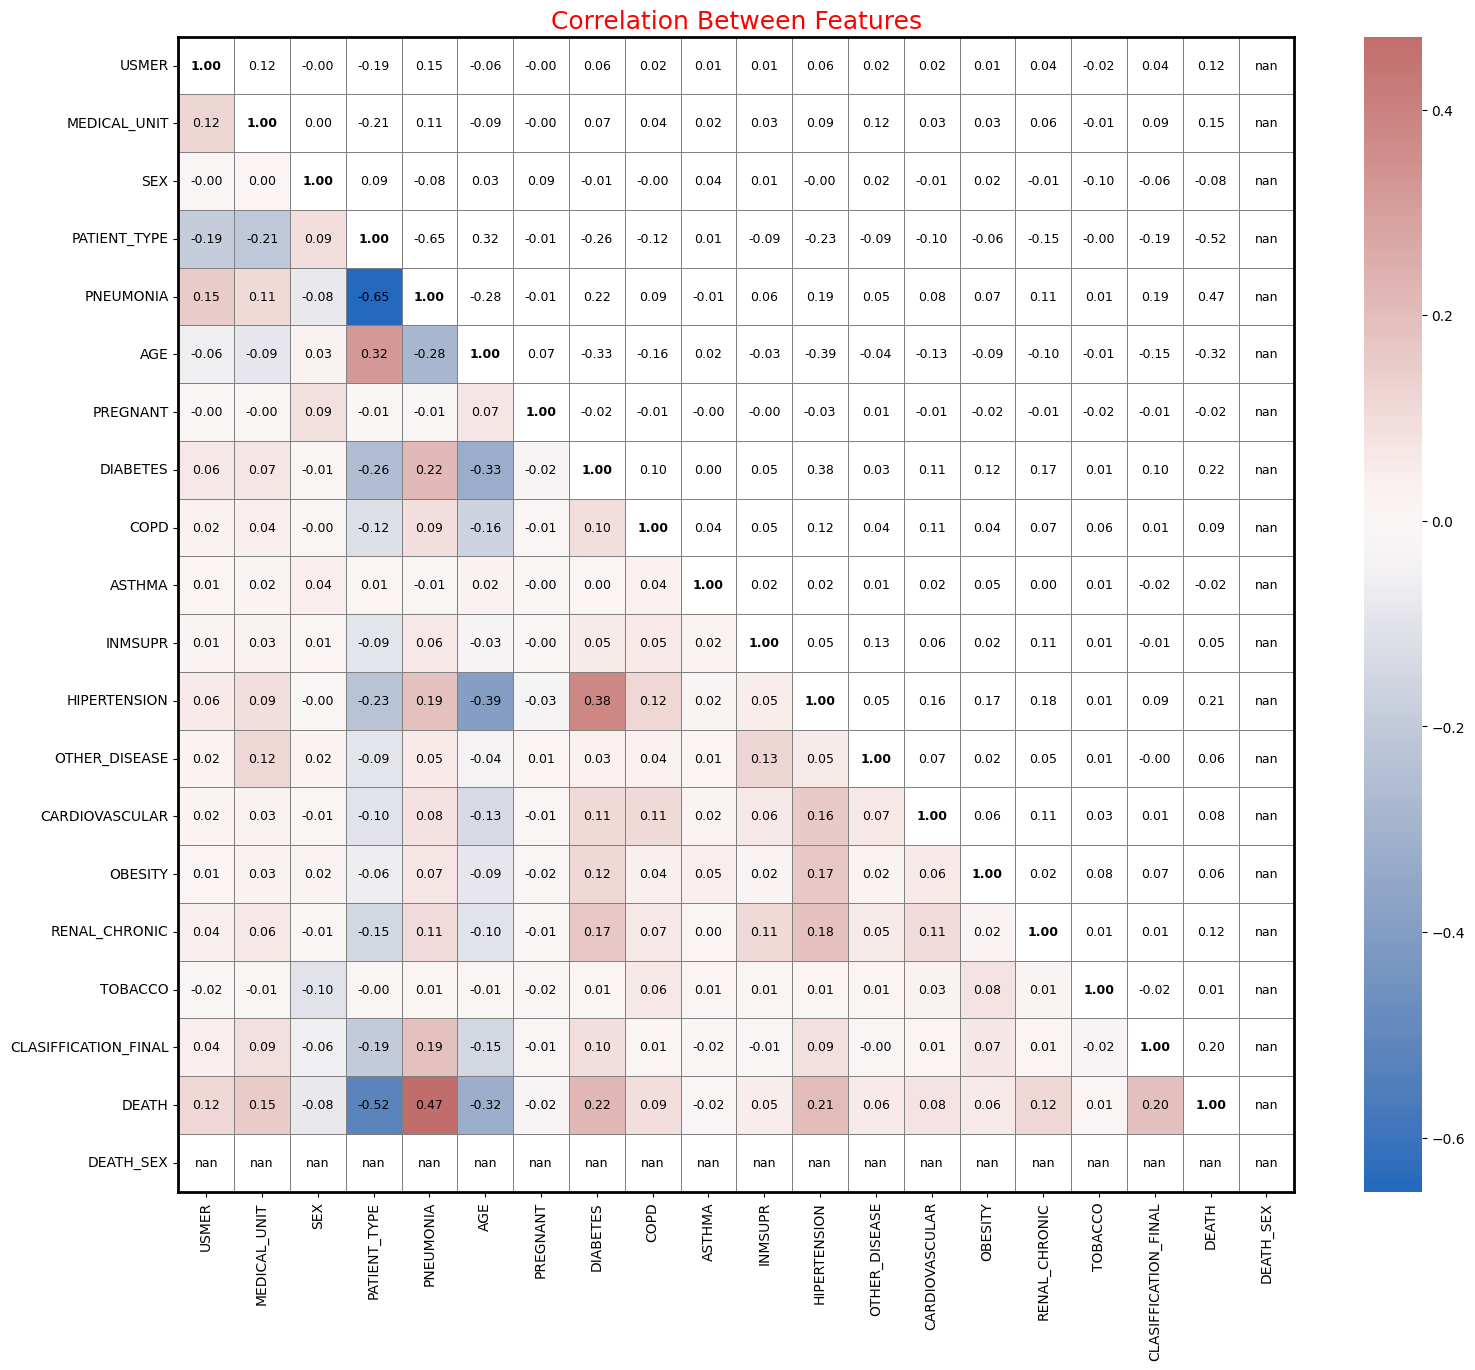

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(0, inplace=True)

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and add border lines for better visibility
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap='vlag', center=0,
            linewidths=0.5, linecolor='grey')

# Loop over data dimensions and create text annotations with dynamic coloring
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        value = corr.iloc[i, j]
        # Choose text color based on a threshold
        text_color = "white" if value > 0.5 else "black"
        # Highlight identical values (correlation of 1) with bold text
        if value == 1:
            plt.text(j+0.5, i+0.5, f"{value:.2f}", 
                     ha="center", va="center", color="black", fontsize=9, fontweight='bold')
        else:
            plt.text(j+0.5, i+0.5, f"{value:.2f}", 
                     ha="center", va="center", color=text_color, fontsize=9)

# Set the title with a specified font size and color
plt.title("Correlation Between Features", fontsize=18, color="red")

# Adding a thick outer border line
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)

# Show the plot
plt.show()


The correlation values can range from -1 to 1:

**Positive Correlation (Above 0):** Indicates that as one feature increases, the other feature tends to also increase. Values closer to +1 indicate a strong positive correlation.

**Zero Correlation (Around 0):** Indicates no linear relationship between the features. Values close to 0 suggest that changes in one feature do not reliably predict changes in the other.

**Negative Correlation (Below 0):** Indicates that as one feature increases, the other feature tends to decrease. Values closer to -1 indicate a strong negative correlation.

### OTHER OBSERVATIONS: 

These correlations suggest which factors may be related to each other and could inform medical resource planning. 

- Death & Pneumonia (0.47): Pneumonia significantly increases the risk of death from COVID-19, warranting intensive monitoring.
- Hypertension & Diabetes (0.38): Co-occurrence of hypertension and diabetes calls for a combined treatment strategy.
- Patient Type & Age (0.32): Higher hospitalization rates in older adults necessitate focused preventative healthcare.
- Pneumonia & Patient Type (-0.65): Pneumonia patients are predominantly hospitalized, emphasizing the need for proactive care.
- Death & Patient Type (-0.52): Greater mortality among hospitalized patients suggests a critical need for enhanced hospital care.
- Hypertension & Age (-0.39): The unexpected decrease in hypertension with age signals potential data irregularities or unique patient characteristics.

# <center> Data Preparation

In [22]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True) # to avoid multicollinearity 

In [23]:
# CATEGORICAL FEATURES
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [24]:
print(df.head)

<bound method NDFrame.head of          USMER  PATIENT_TYPE  PNEUMONIA  AGE  DIABETES  HIPERTENSION  \
0            2             1          1   65         2             1   
1            2             1          1   72         2             1   
2            2             2          2   55         1             2   
3            2             1          2   53         2             2   
4            2             1          2   68         1             1   
...        ...           ...        ...  ...       ...           ...   
1048570      2             1          2   40         2             2   
1048571      1             2          2   51         2             1   
1048572      2             1          2   55         2             2   
1048573      2             1          2   28         2             2   
1048574      2             1          2   52         2             2   

         RENAL_CHRONIC  DEATH  DEATH_SEX  MEDICAL_UNIT_2  ...  \
0                    2      1        0.0

In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [26]:
print(df.head)

<bound method NDFrame.head of          USMER  PATIENT_TYPE  PNEUMONIA       AGE  DIABETES  HIPERTENSION  \
0            2             1          1  1.086957         2             1   
1            2             1          1  1.391304         2             1   
2            2             2          2  0.652174         1             2   
3            2             1          2  0.565217         2             2   
4            2             1          2  1.217391         1             1   
...        ...           ...        ...       ...       ...           ...   
1048570      2             1          2  0.000000         2             2   
1048571      1             2          2  0.478261         2             1   
1048572      2             1          2  0.652174         2             2   
1048573      2             1          2 -0.521739         2             2   
1048574      2             1          2  0.521739         2             2   

         RENAL_CHRONIC  DEATH  DEATH_SEX  MED

# <center> Machine Learning

In [27]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [28]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply Random Undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# Convert data to numpy array and ensure it is contiguous
X_train_us = np.ascontiguousarray(X_train_us)
X_val = np.ascontiguousarray(X_val)  # Ensuring validation data is also contiguous
X_test = np.ascontiguousarray(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', cache_size=7000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(5),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'Easy Ensemble': EasyEnsembleClassifier(n_estimators=10)
}

# Train classifiers on the undersampled training data and evaluate on the validation set
for name, clf in classifiers.items():
    clf.fit(X_train_us, y_train_us)
    pred_y_val = clf.predict(X_val)  # Predicting on the validation set
    print(f"Validation Results for {name}:")
    print(classification_report(y_val, pred_y_val))


Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           1       0.40      0.92      0.56      7465
           2       0.99      0.89      0.94     94733

    accuracy                           0.89    102198
   macro avg       0.70      0.91      0.75    102198
weighted avg       0.95      0.89      0.91    102198

Validation Results for Random Forest:
              precision    recall  f1-score   support

           1       0.37      0.93      0.53      7465
           2       0.99      0.87      0.93     94733

    accuracy                           0.88    102198
   macro avg       0.68      0.90      0.73    102198
weighted avg       0.95      0.88      0.90    102198

Validation Results for SVM:
              precision    recall  f1-score   support

           1       0.35      0.91      0.51      7465
           2       0.99      0.87      0.93     94733

    accuracy                           0.87    102198
   macro avg      

In [29]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

# Ensure data is numpy array and is contiguous
X_train_os = np.ascontiguousarray(X_train_os)

# Train and evaluate classifiers with oversampled data
for name, clf in classifiers.items():
    clf.fit(X_train_os, y_train_os)  # Training with oversampled data
    pred_y_val = clf.predict(X_val)  # Predicting on the validation set
    print(f"Results for {name} (Oversampled - Validation):")
    print(classification_report(y_val, pred_y_val))



Results for Logistic Regression (Oversampled - Validation):
              precision    recall  f1-score   support

           1       0.40      0.92      0.56      7465
           2       0.99      0.89      0.94     94733

    accuracy                           0.89    102198
   macro avg       0.70      0.91      0.75    102198
weighted avg       0.95      0.89      0.91    102198

Results for Random Forest (Oversampled - Validation):
              precision    recall  f1-score   support

           1       0.42      0.83      0.56      7465
           2       0.99      0.91      0.95     94733

    accuracy                           0.90    102198
   macro avg       0.70      0.87      0.75    102198
weighted avg       0.94      0.90      0.92    102198

Results for SVM (Oversampled - Validation):
              precision    recall  f1-score   support

           1       0.35      0.91      0.51      7465
           2       0.99      0.87      0.93     94733

    accuracy            

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_evaluate(classifiers, X_train, y_train, X_val, y_val):
    val_metrics = {
        'Algorithm': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }
    
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        pred_y_val = clf.predict(X_val)
        
        val_metrics['Algorithm'].append(name)
        val_metrics['Accuracy'].append(accuracy_score(y_val, pred_y_val))
        val_metrics['Precision'].append(precision_score(y_val, pred_y_val, average='binary', zero_division=0))
        val_metrics['Recall'].append(recall_score(y_val, pred_y_val, average='binary', zero_division=0))
        val_metrics['F1 Score'].append(f1_score(y_val, pred_y_val, average='binary', zero_division=0))
        
    return val_metrics


In [31]:
# Collect metrics for undersampled data using the validation set
val_metrics_us = train_evaluate(classifiers, X_train_us, y_train_us, X_val, y_val)

# Collect metrics for oversampled data using the validation set
val_metrics_os = train_evaluate(classifiers, X_train_os, y_train_os, X_val, y_val)


In [32]:
import matplotlib.pyplot as plt
import numpy as np  # For setting the positions of the bars

def visualize_metrics(metrics, title):
    n_groups = len(metrics['Algorithm'])
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted size for clarity
    fig.suptitle(title)

    index = np.arange(n_groups)
    bar_width = 0.35

    for ax, metric in zip(axs.flat, ['Accuracy', 'Precision', 'Recall', 'F1 Score']):
        colors = np.random.rand(n_groups, 3)  # Generate a color for each algorithm
        bars = ax.bar(index, metrics[metric], bar_width, label=metric, color=colors)
        
        ax.set_title(metric)
        ax.set_ylabel('Score')
        ax.set_xticks(index)
        ax.set_xticklabels(metrics['Algorithm'], rotation=45, ha="right")
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


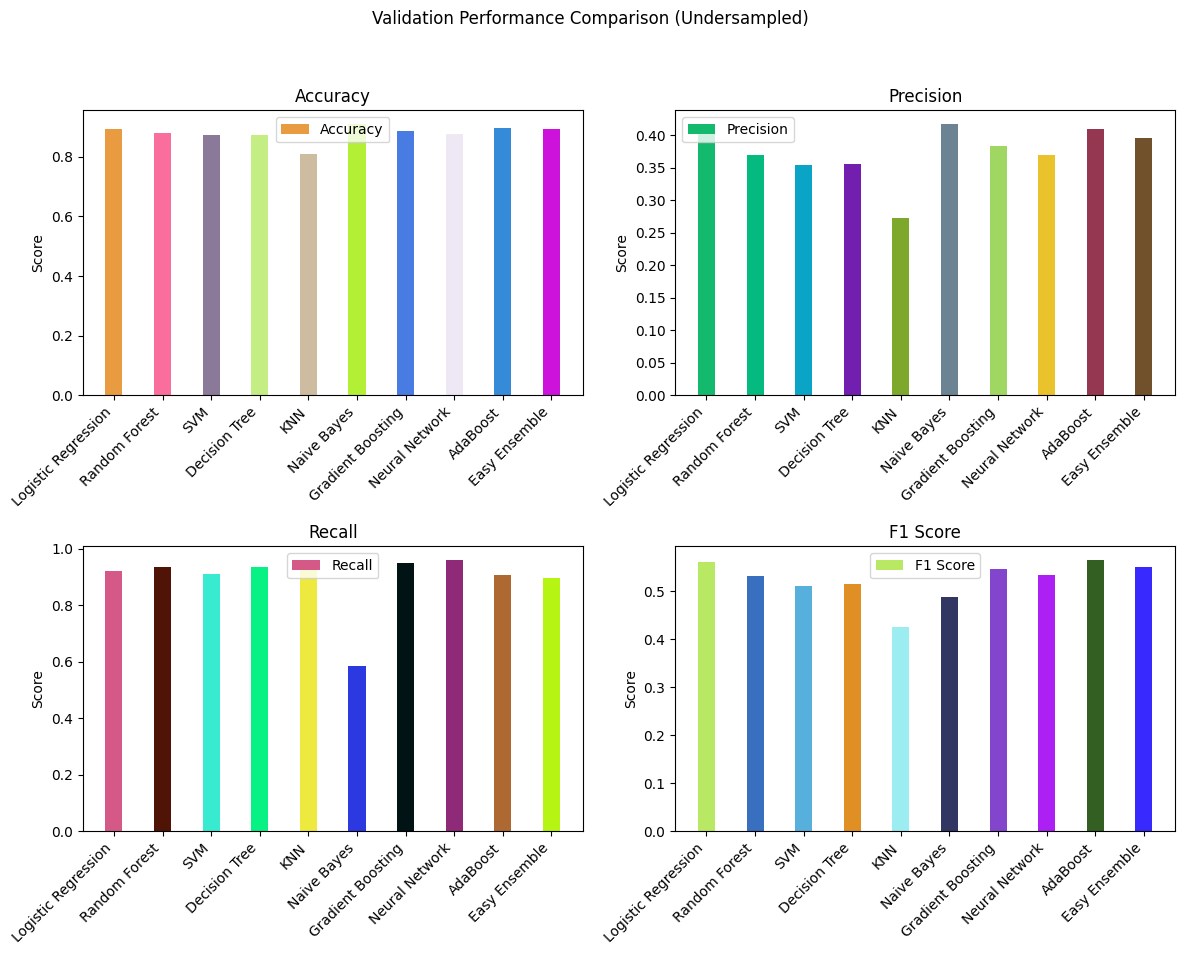

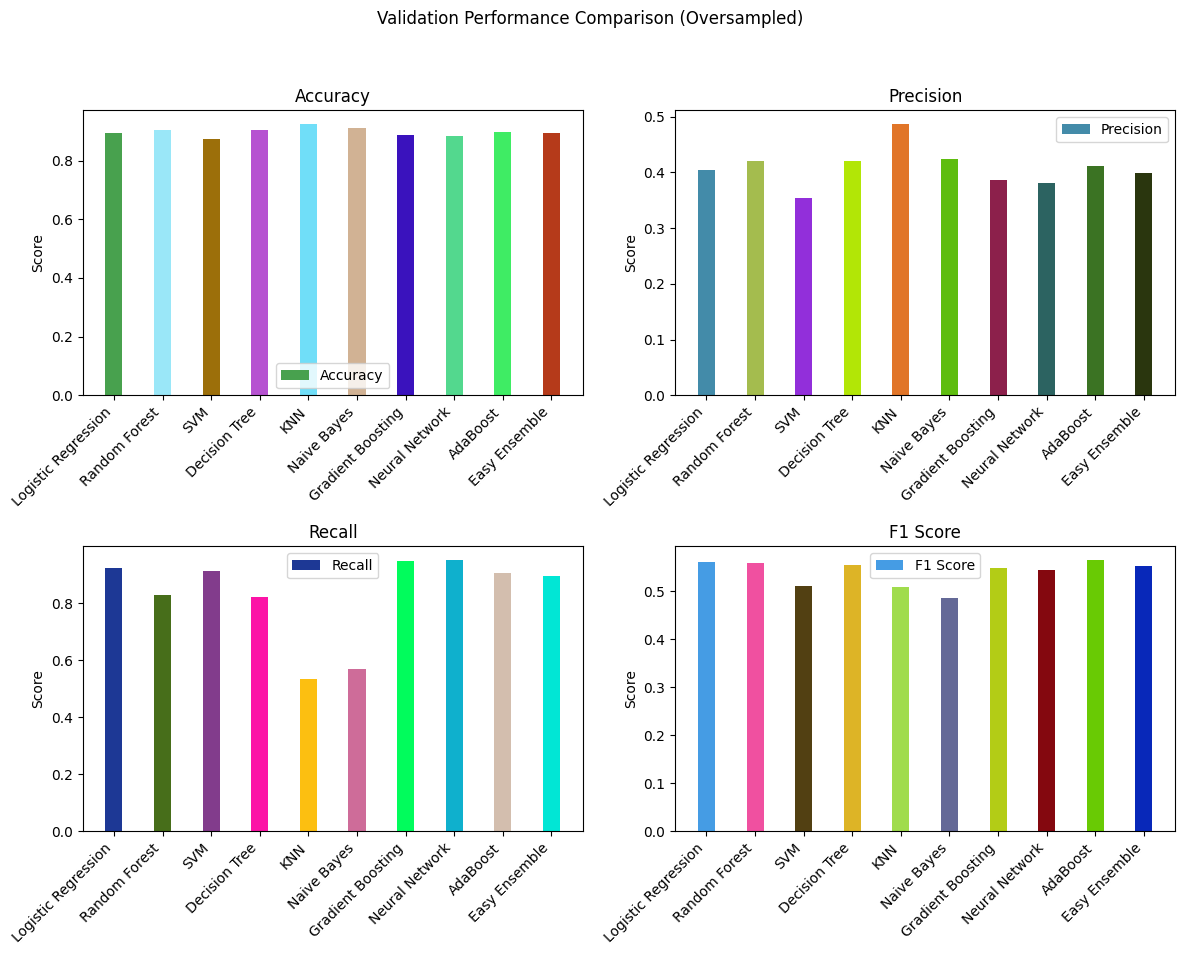

In [33]:
# Visualization for models trained on undersampled data and evaluated on validation set
visualize_metrics(val_metrics_us, 'Validation Performance Comparison (Undersampled)')

# Visualization for models trained on oversampled data and evaluated on validation set
visualize_metrics(val_metrics_os, 'Validation Performance Comparison (Oversampled)')


In [48]:
# Let's say you chose the Gradient Boosting model trained with undersampled data
chosen_model = GradientBoostingClassifier(n_estimators=100) #max_iter=1000

# If you decide to retrain on both training and validation data
X_train_val = np.concatenate((X_train_us, X_val), axis=0)
y_train_val = np.concatenate((y_train_us, y_val), axis=0)

# Retraining the chosen model (optional)
chosen_model.fit(X_train_val, y_train_val)

# Predicting on the test set
pred_y_test = chosen_model.predict(X_test)

# Evaluating the model's performance on the test set
from sklearn.metrics import classification_report
print("Final Test Set Performance:")
print(classification_report(y_test, pred_y_test))


Final Test Set Performance:
              precision    recall  f1-score   support

           1       0.44      0.90      0.59      7466
           2       0.99      0.91      0.95     94732

    accuracy                           0.91    102198
   macro avg       0.71      0.90      0.77    102198
weighted avg       0.95      0.91      0.92    102198



In [44]:
# Predicting on the test set
pred_y_val = chosen_model.predict(X_val)

# Evaluating the model's performance on the test set
from sklearn.metrics import classification_report
print("Final Validation Set Performance:")
print(classification_report(y_val, pred_y_val))

Final Validation Set Performance:
              precision    recall  f1-score   support

           1       0.30      0.94      0.45      7465
           2       0.99      0.83      0.90     94733

    accuracy                           0.83    102198
   macro avg       0.65      0.88      0.68    102198
weighted avg       0.94      0.83      0.87    102198



In [47]:
# Predicting on the test set
pred_y_train = chosen_model.predict(X_train_us)

# Evaluating the model's performance on the test set
from sklearn.metrics import classification_report
print("Final Validation Set Performance:")
print(classification_report(y_train_us, pred_y_train))

Final Validation Set Performance:
              precision    recall  f1-score   support

           1       0.85      0.95      0.90     59726
           2       0.95      0.83      0.88     59726

    accuracy                           0.89    119452
   macro avg       0.90      0.89      0.89    119452
weighted avg       0.90      0.89      0.89    119452



## Technical Appendix

### Data Source
The dataset used in this project was provided by the Mexican government and contains anonymized patient-related information, including pre-existing conditions and COVID-19 test results. The dataset consists of 21 unique features and 1,048,576 unique patients.

Mexican Government's COVID-19 case dataset: Información referente a casos COVID-19 en México (https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)

Kaggle's COVID-19 Dataset: COVID-19 Dataset on Kaggle
(https://www.kaggle.com/datasets/meirnizri/covid19-dataset)


### Features
- sex: Gender of the patient (1 for female, 2 for male).
- age: Age of the patient.
- classification: COVID-19 test findings, with values 1-3 indicating different degrees of infection, and values 4 or higher indicating no infection or an inconclusive test.
- patient type: Type of care received by the patient (1 for home care, 2 for hospitalization).
- pneumonia: Presence of air sac inflammation (1 for yes, 2 for no).
- pregnancy: Pregnancy status of the patient (1 for yes, 2 for no).
- diabetes: Presence of diabetes (1 for yes, 2 for no).
- copd: Presence of Chronic obstructive pulmonary disease (1 for yes, 2 for no).
- asthma: Presence of asthma (1 for yes, 2 for no).
- inmsupr: Immunosuppression status (1 for yes, 2 for no).
- hypertension: Presence of hypertension (1 for yes, 2 for no).
- cardiovascular: Presence of heart or blood vessel-related disease (1 for yes, 2 for no).
- renal chronic: Presence of chronic renal disease (1 for yes, 2 for no).
- other disease: Presence of other diseases (1 for yes, 2 for no).
- obesity: Obesity status of the patient (1 for yes, 2 for no).
- tobacco: Tobacco use status of the patient (1 for yes, 2 for no).
- usmr: Type of medical unit treatment received by the patient (1, 2, or 3).
- medical unit: Type of institution providing care.
- intubed: Whether the patient was connected to a ventilator (1 for yes, 2 for no).
- icu: Whether the patient was admitted to an Intensive Care Unit (1 for yes, 2 for no).
- date died: Date of death for deceased patients (in the format YYYY-MM-DD), or 9999-99-99 otherwise.

### Data Preprocessing
The dataset underwent preprocessing to handle missing data (values 97 and 99), convert boolean features to binary format, and normalize numerical features as necessary. Categorical variables were encoded using one-hot encoding to prepare the data for machine learning model training.

### Machine Learning Models
Several machine learning models were employed in this project, including logistic regression, random forest, support vector machine (SVM), decision tree, K-nearest neighbors (KNN), Naive Bayes, Gradient Boosting, Neural Network, AdaBoost, and Easy Ensemble. Each model was trained and evaluated using various metrics to assess its performance in predicting the risk level of COVID-19 patients.